In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
from matplotlib import dates

In [2]:
samples = pd.read_csv("../1-GettingQuestions/sampleQuestions.csv")
samples["full_name"] = samples["framework"] + "/" +samples["path"]
samples = samples["full_name"].unique()

In [3]:
def loadMetrics(listSamples):
    metrics = dict()
    for sample in listSamples:
        metrics[sample] = pd.read_csv(f"../3-DataMerge/{sample}.csv", index_col=[0,1], na_filter=False, infer_datetime_format=False)
        dateframe = pd.DataFrame(metrics[sample].index.values.tolist(), columns=['year','month'])
        dateframe["day"] = 1
        dataframe = pd.to_datetime(dateframe)
        metrics[sample].set_index(dataframe, inplace=True)
    return metrics

In [4]:
metrics_questions = loadMetrics(samples)

In [5]:
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (12, 4),
         'axes.labelsize': 'x-large',
         'axes.titlesize':25,
         'xtick.labelsize': 25,
         'axes.labelsize': 25,
         'ytick.labelsize':25,
          'lines.linewidth': 3
         }
plt.rcParams.update(params)

In [9]:
def plotSourceCodeMetrics(sample, dataset):
    metrics = [
        "PL",
#        "ELOC",
        "LOC",
#        "BL",
#         "STMT",
#         "ESTMT",
#        "DLOC",
#         "DSTMT",
        "CLOC",
        "AM",
#         "LM",
#         "PM",
         "NV",
#         "NPM",
#          "NIV",
#          "NPRM"
    ]
    for metric in metrics:
        subplot = dataset[metric].plot(legend=True)
    
    subplot.set_ylabel("Source code")
    subplot.set_xlabel("Time")
#     subplot.set_title(f"Code size")
    subplot.figure.savefig(f"{sample}",bbox_inches = 'tight')    

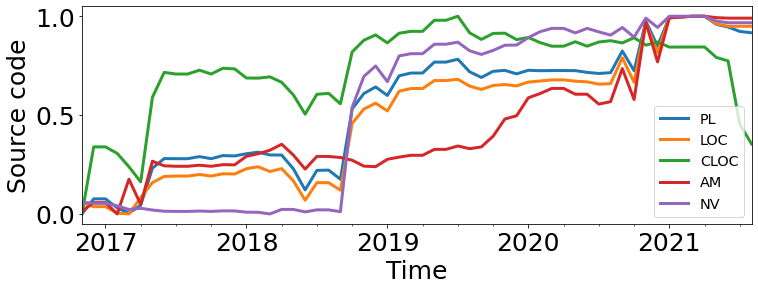

In [10]:
sample = "googlesamples/androidtv-sample-inputs"
sample = "aws-samples/aws-cloudhsm-jce-examples"
sample = "googlearchive/android-MediaRecorder"
sample = "spring-cloud-samples/spring-cloud-contract-samples"
plotSourceCodeMetrics("sourceCodeSizeExample.pdf", metrics_questions[sample])

2 - Source code readability

In [11]:
def plotReadability(sample, dataset):
    subplot = dataset["BWR"].plot(legend=True)
    subplot = dataset["SAR"].plot(legend=True)
    subplot = dataset["CCR"].plot(legend=True)
#     subplot.set_title(f"Source code readability")
    subplot.set_ylabel("Readability")
    subplot.set_xlabel("Time")
    subplot.figure.savefig(f"{sample}",bbox_inches = 'tight')

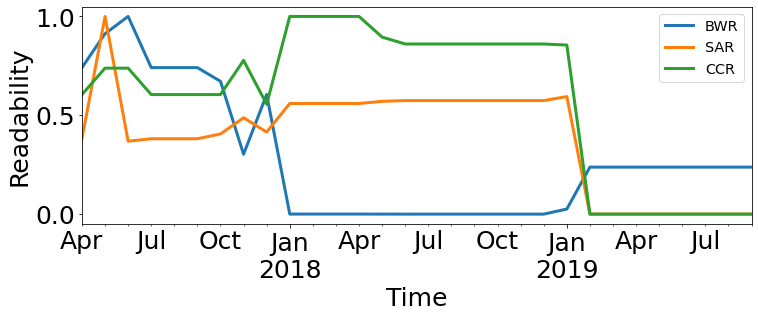

In [14]:
# sample = "googlearchive/android-EmojiCompat"
# sample = "googlearchive/tango-examples-java"
sample = "googlearchive/android-instant-apps"

plotReadability("sourceCodeReadabilityExample.pdf", metrics_questions[sample])

3 - Project size

In [15]:
def plotProjectSizeMetrics(sample, dataset):
    subplot = dataset["JAVA"].plot(legend=True)
    subplot = dataset["CLASSES"].plot(legend=True)
    subplot = dataset["PKG"].plot(legend=True)
    #subplot = dataset["questions"].plot(legend=True)
#     subplot.set_title(f"Project size")
    subplot.set_xlabel("Time")
    subplot.set_ylabel("Project size")
    subplot.figure.savefig(f"{sample}",bbox_inches = 'tight')

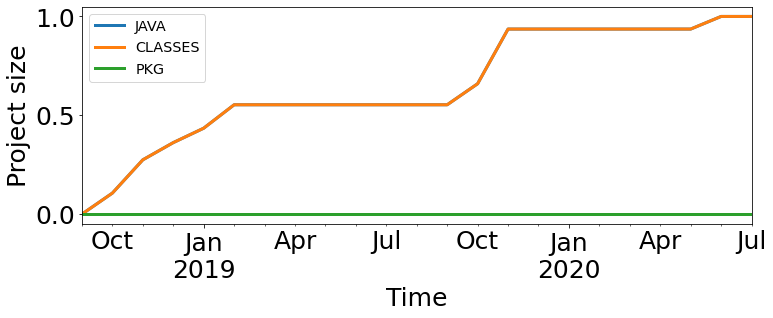

In [19]:
sample = "aws-samples/aws-cloudhsm-jce-examples"
# sample = "Azure-Samples/ms-identity-java-webapi"
# sample = "spring-guides/tut-rest"

plotProjectSizeMetrics("projectSizeExample.pdf", metrics_questions[sample])

4 - OO Metrics

In [12]:
def plotOOMetrics(sample, dataset):
    subplot = dataset["WMC"].plot(legend=True)     
    subplot = dataset["RFC"].plot(legend=True)
    subplot = dataset["DIT"].plot(legend=True)
    subplot = dataset["CBO"].plot(legend=True)
    subplot = dataset["NOC"].plot(legend=True)
    subplot = dataset["LCOM"].plot(legend=True)
    #subplot = dataset["questions"].plot(legend=True)
    subplot.set_ylabel("OO metrics")
    subplot.set_xlabel("Time")
#     subplot.set_title(f"OO metrics")
    subplot.figure.savefig(f"{sample}",bbox_inches = 'tight')

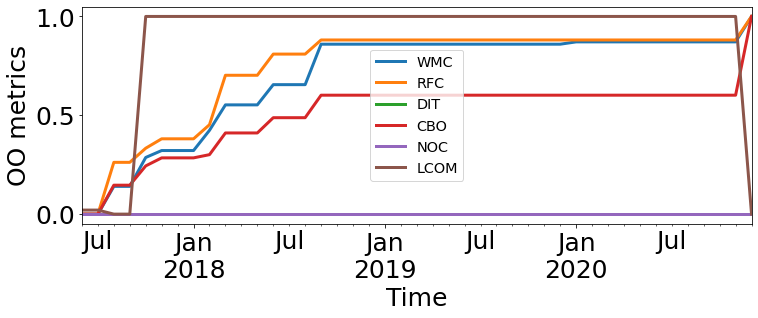

In [13]:
sample = "Azure-Samples/acr-java-manage-azure-container-registry"
# sample = "Azure-Samples/ms-identity-java-desktop"
# sample = "googlearchive/android-BasicManagedProfile"
# sample = "googlearchive/android-ActiveNotifications"

plotOOMetrics("ooMetricsExample.pdf", metrics_questions[sample])

In [14]:
def plotComplexityMetrics(sample, dataset):
    subplot = dataset["EC"].plot(legend=True)     
    subplot = dataset["CC"].plot(legend=True)
    subplot = dataset["CCM"].plot(legend=True)
    subplot = dataset["CCS"].plot(legend=True)
    subplot = dataset["NPATH"].plot(legend=True)
    subplot = dataset["FANIN"].plot(legend=True)
    subplot = dataset["FANOUT"].plot(legend=True)
#     subplot = dataset["NPLOG"].plot(legend=True)
    subplot = dataset["KNTS"].plot(legend=True)
    subplot.set_ylabel("Complexity metrics")
    subplot.set_xlabel("Time")
#     subplot.set_title(f"OO metrics")
    subplot.figure.savefig(f"{sample}",bbox_inches = 'tight')

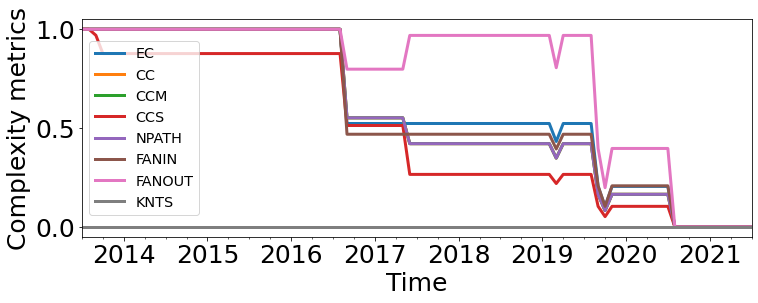

In [15]:
# sample = "spring-guides/gs-producing-web-service"
# sample = "spring-guides/gs-multi-module"
# sample = "spring-guides/gs-scheduling-tasks"
# sample = "spring-guides/gs-consuming-rest"
sample = "spring-guides/gs-async-method"



plotComplexityMetrics("complexityMetricsExample.pdf", metrics_questions[sample])

In [28]:
def plotSourceCodeMetrics(sample, dataset):
    subplot = dataset["PL"].plot(legend=True)
    subplot = dataset["LOC"].plot(legend=True)
    subplot = dataset["DLOC"].plot(legend=True)
    subplot = dataset["ELOC"].plot(legend=True)
    subplot = dataset["CLOC"].plot(legend=True)
    subplot = dataset["BL"].plot(legend=True)
    subplot = dataset["NV"].plot(legend=True)
    subplot = dataset["NIV"].plot(legend=True)
    subplot = dataset["AM"].plot(legend=True)
    subplot = dataset["NPRM"].plot(legend=True)
    subplot = dataset["NPM"].plot(legend=True)
    subplot = dataset["PM"].plot(legend=True)
    subplot = dataset["LM"].plot(legend=True)
    subplot = dataset["STMT"].plot(legend=True)
    subplot = dataset["DSTMT"].plot(legend=True)
    subplot = dataset["ESTMT"].plot(legend=True)
    subplot = dataset["questions"].plot(legend=True)
    subplot.set_ylabel("Source code")
    subplot.set_title(f"Code size of {sample}")
    subplot.figure.savefig(f"1-CodeSamples/{sample}-source-code-size.jpg",bbox_inches = 'tight')    

In [29]:
def plotReadability(sample, dataset):
    subplot = dataset["BWR"].plot(legend=True)
    subplot = dataset["SAR"].plot(legend=True)
    subplot = dataset["CCR"].plot(legend=True)
    subplot = dataset["questions"].plot(legend=True)
    subplot.set_title(f"Readability of {sample}")
    subplot.set_ylabel("Readability")
    subplot.figure.savefig(f"1-CodeSamples/{sample}-readability.jpg",bbox_inches = 'tight')

In [30]:
def plotProjectSizeMetrics(sample, dataset):
    subplot = dataset["CLASSES"].plot(legend=True)
    subplot = dataset["JAVA"].plot(legend=True)
    subplot = dataset["PKG"].plot(legend=True)
    subplot = dataset["questions"].plot(legend=True)
    subplot.set_title(f"Project size of {sample}")
    subplot.set_ylabel("Project size")
    subplot.figure.savefig(f"1-CodeSamples/{sample}-project-size.jpg",bbox_inches = 'tight')

In [31]:
def plotOOMetrics(sample, dataset):
    subplot = dataset["WMC"].plot(legend=True)     
    subplot = dataset["RFC"].plot(legend=True)
    subplot = dataset["DIT"].plot(legend=True)
    subplot = dataset["CBO"].plot(legend=True)
    subplot = dataset["NOC"].plot(legend=True)
    subplot = dataset["LCOM"].plot(legend=True)
    subplot = dataset["questions"].plot(legend=True)
    subplot.set_ylabel("OO metrics")
    subplot.set_title(f"OO metrics of {sample}")
    subplot.figure.savefig(f"1-CodeSamples/{sample}-oo-metrics.jpg",bbox_inches = 'tight')

In [32]:
def plotComplexityMetrics(sample, dataset):
    subplot = dataset["FANIN"].plot(legend=True)     
    subplot = dataset["FANOUT"].plot(legend=True)
    subplot = dataset["CC"].plot(legend=True)
    subplot = dataset["CCM"].plot(legend=True)
    subplot = dataset["CCS"].plot(legend=True)
    subplot = dataset["EC"].plot(legend=True)
    subplot = dataset["KNTS"].plot(legend=True)
    subplot = dataset["NPATH"].plot(legend=True)
    subplot = dataset["NPLOG"].plot(legend=True)
    subplot = dataset["questions"].plot(legend=True)
    subplot.set_ylabel("OO metrics")
    subplot.set_title(f"OO metrics of {sample}")
    subplot.figure.savefig(f"1-CodeSamples/{sample}-oo-metrics.jpg",bbox_inches = 'tight')

In [35]:
def plotAllMetrics(dataset):
    for sample in dataset.keys():
        plotSourceCodeMetrics(sample, dataset[sample])
        plt.clf()
        plotReadability(sample, dataset[sample])
        plt.clf()
        plotProjectSizeMetrics(sample, dataset[sample])
        plt.clf()
        plotOOMetrics(sample, dataset[sample])
        plt.clf()
        plotComplexityMetrics(sample, dataset[sample])
        plt.clf()

In [41]:
plotAllMetrics(metrics_questions)

<Figure size 864x288 with 0 Axes>

In [47]:
def printImgHtml(listSamples):
    for sample in listSamples.keys():
        print(f"<img src='5-PlottingGraphics/1-CodeSamples/{sample}-source-code-size.jpg'>")
        print(f"<img src='5-PlottingGraphics/1-CodeSamples/{sample}-readability.jpg'>")
        print(f"<img src='5-PlottingGraphics/1-CodeSamples/{sample}-project-size.jpg'>")
        print(f"<img src='5-PlottingGraphics/1-CodeSamples/{sample}-oo-metrics.jpg'>")

In [48]:
printImgHtml(metrics_questions)

<img src='5-PlottingGraphics/1-CodeSamples/googlesamples/io2014-codelabs-source-code-size.jpg'>
<img src='5-PlottingGraphics/1-CodeSamples/googlesamples/io2014-codelabs-readability.jpg'>
<img src='5-PlottingGraphics/1-CodeSamples/googlesamples/io2014-codelabs-project-size.jpg'>
<img src='5-PlottingGraphics/1-CodeSamples/googlesamples/io2014-codelabs-oo-metrics.jpg'>
<img src='5-PlottingGraphics/1-CodeSamples/googlesamples/android-play-publisher-api-source-code-size.jpg'>
<img src='5-PlottingGraphics/1-CodeSamples/googlesamples/android-play-publisher-api-readability.jpg'>
<img src='5-PlottingGraphics/1-CodeSamples/googlesamples/android-play-publisher-api-project-size.jpg'>
<img src='5-PlottingGraphics/1-CodeSamples/googlesamples/android-play-publisher-api-oo-metrics.jpg'>
<img src='5-PlottingGraphics/1-CodeSamples/googlesamples/androidtv-sample-inputs-source-code-size.jpg'>
<img src='5-PlottingGraphics/1-CodeSamples/googlesamples/androidtv-sample-inputs-readability.jpg'>
<img src='5-Plo